In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import networkx as nx

In [2]:
df = pd.read_csv('brasil.csv')
df

,ano,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,tipo_emissao,gas,atividade_economica,produto,emissao
0,1970,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,230462.170000
1,1971,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,226016.300000
2,1972,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,220101.200000
3,1973,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,214195.560000
4,1974,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,186862.840000
...,...,...,...,...,...,...,...,...,...,...,...,...
454845,2015,Resíduos,Resíduos Sólidos,Tratamento Biológico de Resíduos Sólidos,Resíduos Sólidos Urbanos,Compostagem,NÃO SE APLICA,Emissão,N2O (t),SANEAMENTO,NaN,74.195798
454846,2016,Resíduos,Resíduos Sólidos,Tratamento Biológico de Resíduos Sólidos,Resíduos Sólidos Urbanos,Compostagem,NÃO SE APLICA,Emissão,N2O (t),SANEAMENTO,NaN,69.360711
454847,2017,Resíduos,Resíduos Sólidos,Tratamento Biológico de Resíduos Sólidos,Resíduos Sólidos Urbanos,Compostagem,NÃO SE APLICA,Emissão,N2O (t),SANEAMENTO,NaN,69.919672
454848,2018,Resíduos,Resíduos Sólidos,Tratamento Biológico de Resíduos Sólidos,Resíduos Sólidos Urbanos,Compostagem,NÃO SE APLICA,Emissão,N2O (t),SANEAMENTO,NaN,70.507559


In [3]:
# df = df.groupby(by='gas').sum().reset_index()

In [26]:
atividades_nivel_1 = df['nivel_1'].unique()
gases = df['gas'].unique()

In [27]:
relacao_nivel_1_gas = df[['nivel_1', 'gas']]
relacao_nivel_1_gas = relacao_nivel_1_gas.to_numpy()

# Grafo com relações entre atividades e gás emitido

In [28]:
G = nx.Graph()
G.add_nodes_from(atividades_nivel_1)
G.add_nodes_from(gases)

# Adicionando os relaçionamentos
G.add_edges_from(relacao_nivel_1_gas)

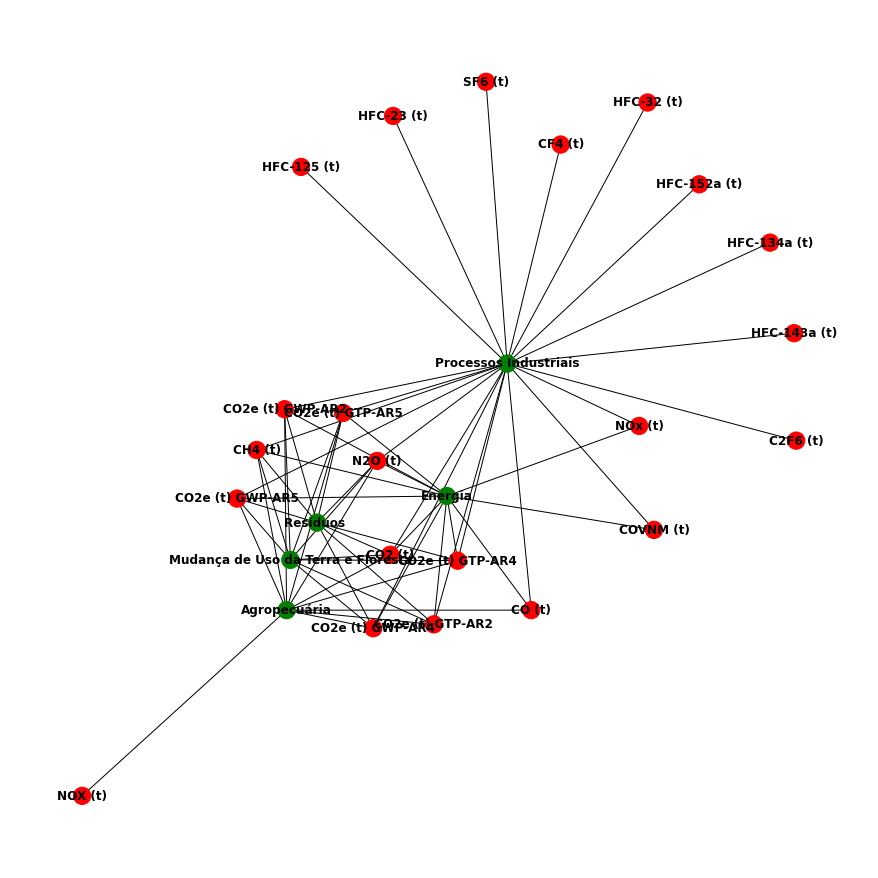

In [32]:
# Plotando gráfico
plt.figure(figsize=(12, 12))

get_color = lambda node: 'red' if node in gases else 'green'

color_values = [get_color(node) for node in G.nodes()]

nx.draw(G, with_labels=True, node_color=color_values, font_weight='bold')

plt.show()
